In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [45]:
## Data prepare
# Reads the csv into panda
df=pd.read_csv("Resources/myopia.csv")

labels = df['MYOPIC']
# Previews the DataFrame
df.head(3)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0


In [6]:
# Removes the MYOPIC column from the dataset
df1=df.drop(labels='MYOPIC',axis=1)
df1.head(3)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0


In [21]:
# Standardises the dataset using a scaler
scaler = StandardScaler()
scaler.fit(df1)
# Names the resulting DataFrame X
X = scaler.transform(df1)

In [35]:
## Dimensionality Reduction

# PCA model is created and used to reduce dimensions of the scaled dataset
# Initialise PCA model
pca = PCA(n_components=0.9)

# Get two principal components for the iris data.
myopia_pca = pca.fit_transform(X)

# # Transform PCA data to a DataFrame
# df_myopia_pca = pd.DataFrame(
#     data=myopia_pca, columns=["principal component 1", "principal component 2"]
# )
# df_myopia_pca.head()

In [39]:
# PCA model’s explained variance is set to 90% (0.9) 
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [40]:
# The shape of the reduced dataset is examined for reduction in number of features
myopia_pca.shape

(618, 10)

In [42]:
## t-SNE model is created and used to reduce dimensions of the scaled dataset
tsne = TSNE(learning_rate=250, n_components=3, perplexity=50, verbose=1, n_iter=2500)
#Reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)

c:\Users\chun\anaconda3\envs\mlenv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.007s...
[t-SNE] Computed neighbors for 618 samples in 0.070s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 1.438866
[t-SNE] KL divergence after 250 iterations with early exaggeration: 101.405823
[t-SNE] KL divergence after 2500 iterations: 1.992956


In [43]:
# Get the shape of features after reduction
tsne_features.shape

(618, 3)

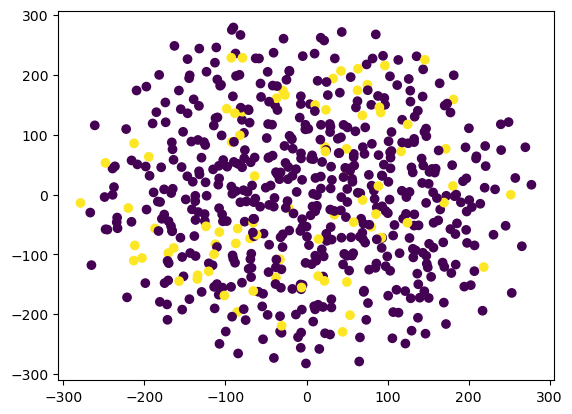

In [46]:
# t-SNE is used to create a plot of the reduced features
plt.scatter(tsne_features[:,0],tsne_features[:,1],c=labels)